In [ ]:
# =============================================================================
# IMPORTS Y CONFIGURACIÓN INICIAL
# =============================================================================

# Manipulación de datos
import pandas as pd
import numpy as np
import pickle

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor  # 🔄 CAMBIO AQUÍ
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import NearestNeighbors

# Configuración
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

In [ ]:
# =============================================================================
# FASE 1: COMPRENSIÓN DEL NEGOCIO (BUSINESS UNDERSTANDING)
# =============================================================================

print("="*80)
print("FASE 1: COMPRENSIÓN DEL NEGOCIO")
print("="*80)


FASE 1: COMPRENSIÓN DEL NEGOCIO


## 📋 PROBLEMA
Los hospitales y centros de salud en Perú enfrentan desafíos en la gestión
eficiente de recursos para realizar tamizajes (screenings) de salud mental.
La demanda de tamizajes varía según región, tipo de trastorno, grupo etario,
y temporada, lo que dificulta la planificación y asignación óptima de personal
y recursos.

## 💡 SOLUCIÓN
Desarrollar un modelo de Machine Learning que prediga la tasa de positividad
de tamizajes de salud mental basándose en características demográficas,
geográficas y temporales.

## 🎯 OBJETIVO
Predecir la tasa de positividad de tamizajes de salud mental para:
- Optimizar la asignación de personal médico especializado
- Mejorar la gestión de recursos hospitalarios
- Priorizar intervenciones preventivas en poblaciones de alto riesgo
- Reducir tiempos de espera y mejorar la calidad de atención

## 📊 DATASET
- Registros: ~200,000 tamizajes
- Periodo: 2017
- Variables: 45 (temporales, geográficas, demográficas, clínicas)
- Target: Tasa_Positividad

In [ ]:
# =============================================================================
# FASE 2: COMPRENSIÓN DE LOS DATOS (DATA UNDERSTANDING)
# =============================================================================

print("\n" + "="*80)
print("FASE 2: COMPRENSIÓN DE LOS DATOS")
print("="*80)


FASE 2: COMPRENSIÓN DE LOS DATOS


In [ ]:
# -----------------------------------------------------------------------------
# 2.1. Carga de Datos
# -----------------------------------------------------------------------------
print("\n2.1. CARGA DE DATOS")
print("-"*80)

df = pd.read_csv('tamizajes.csv', sep=';', encoding='latin1')

print(f"✅ Dataset cargado exitosamente")
print(f"   - Registros: {df.shape[0]:,}")
print(f"   - Variables: {df.shape[1]:,}")



2.1. CARGA DE DATOS
--------------------------------------------------------------------------------
✅ Dataset cargado exitosamente
   - Registros: 236,527
   - Variables: 11


In [ ]:
# -----------------------------------------------------------------------------
# 2.2. Exploración Inicial
# -----------------------------------------------------------------------------
print("\n2.2. EXPLORACIÓN INICIAL")
print("-"*80)

print("\n📊 Información General del Dataset:")
df.info()

print("\n📊 Primeras Filas:")
print(df.head())

print("\n📊 Últimas Filas:")
print(df.tail())

print("\n📊 Estadísticas Descriptivas:")
print(df.describe().round(4))


2.2. EXPLORACIÓN INICIAL
--------------------------------------------------------------------------------

📊 Información General del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236527 entries, 0 to 236526
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Anio             236527 non-null  int64 
 1   NroMes           236527 non-null  int64 
 2   ubigeo           236527 non-null  int64 
 3   Departamento     236527 non-null  object
 4   Provincia        236527 non-null  object
 5   Distrito         236527 non-null  object
 6   Sexo             236527 non-null  object
 7   Etapa            236527 non-null  object
 8   GrupoTamizaje    236527 non-null  object
 9   DetalleTamizaje  236527 non-null  object
 10  Casos            236527 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 19.9+ MB

📊 Primeras Filas:
   Anio  NroMes  ubigeo Departamento Provincia Distrito Sexo    Etapa  \
0  20

In [ ]:
# -----------------------------------------------------------------------------
# 2.3. Análisis de Calidad de Datos
# -----------------------------------------------------------------------------
print("\n2.3. ANÁLISIS DE CALIDAD DE DATOS")
print("-"*80)

# Valores nulos
missing_data = pd.DataFrame({
    'Columna': df.columns,
    'Valores_Nulos': df.isnull().sum(),
    'Porcentaje': (df.isnull().sum()/len(df)*100).round(2)
})
missing_data = missing_data[missing_data['Valores_Nulos'] > 0].sort_values('Valores_Nulos', ascending=False)

if len(missing_data) > 0:
    print("\n⚠️ VALORES NULOS ENCONTRADOS:")
    print(missing_data.to_string(index=False))
else:
    print("\n✅ No se encontraron valores nulos en el dataset")

# Registros duplicados
duplicates = df.duplicated().sum()
print(f"\n📌 Registros duplicados: {duplicates} ({(duplicates/len(df)*100):.2f}%)")



2.3. ANÁLISIS DE CALIDAD DE DATOS
--------------------------------------------------------------------------------

✅ No se encontraron valores nulos en el dataset

📌 Registros duplicados: 0 (0.00%)


In [ ]:
# -----------------------------------------------------------------------------
# 2.4. Análisis Exploratorio Visual
# -----------------------------------------------------------------------------
print("\n2.4. ANÁLISIS EXPLORATORIO VISUAL")
print("-"*80)



2.4. ANÁLISIS EXPLORATORIO VISUAL
--------------------------------------------------------------------------------


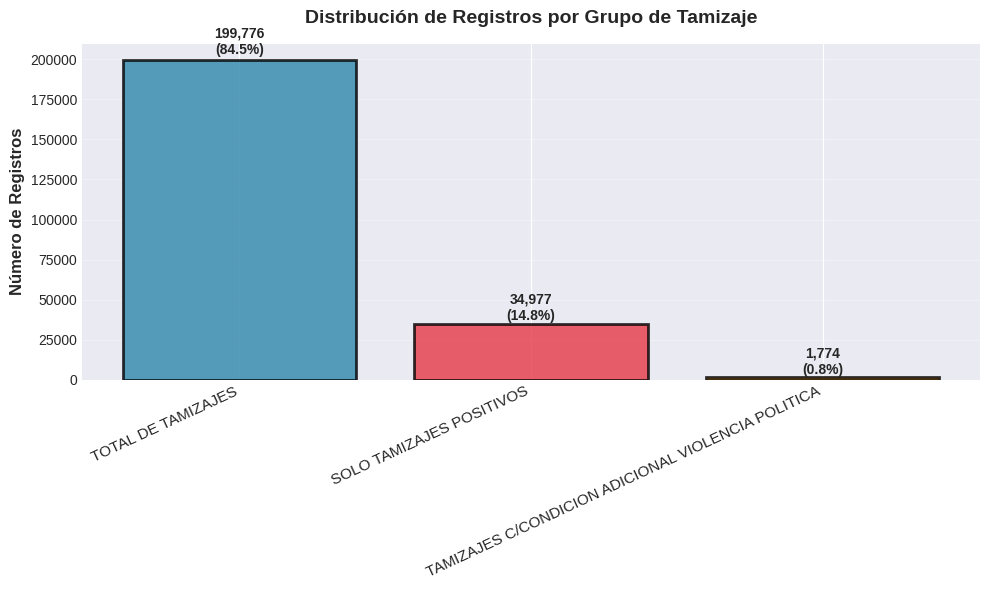

In [ ]:
# Gráfico 1: Distribución por Grupo de Tamizaje
grupo_counts = df['GrupoTamizaje'].value_counts()
grupo_pct = (grupo_counts / len(df)) * 100

plt.figure(figsize=(10, 6))
colors = ['#2E86AB', '#E63946', '#F18F01']
bars = plt.bar(
    range(len(grupo_counts)),
    grupo_counts.values,
    color=colors[:len(grupo_counts)],
    alpha=0.8,
    edgecolor='black',
    linewidth=2
)

plt.xticks(range(len(grupo_counts)), grupo_counts.index, rotation=25, ha='right', fontsize=11)
plt.ylabel('Número de Registros', fontsize=12, fontweight='bold')
plt.title('Distribución de Registros por Grupo de Tamizaje', fontsize=14, fontweight='bold', pad=15)
plt.grid(axis='y', alpha=0.3)

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + (height * 0.01),
        f'{grupo_counts.iloc[i]:,}\n({grupo_pct.iloc[i]:.1f}%)',
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.tight_layout()
plt.savefig('EDA_01_distribucion_grupo_tamizaje.png', dpi=300, bbox_inches='tight')
plt.show()


📊 Suma Total de Casos por GrupoTamizaje


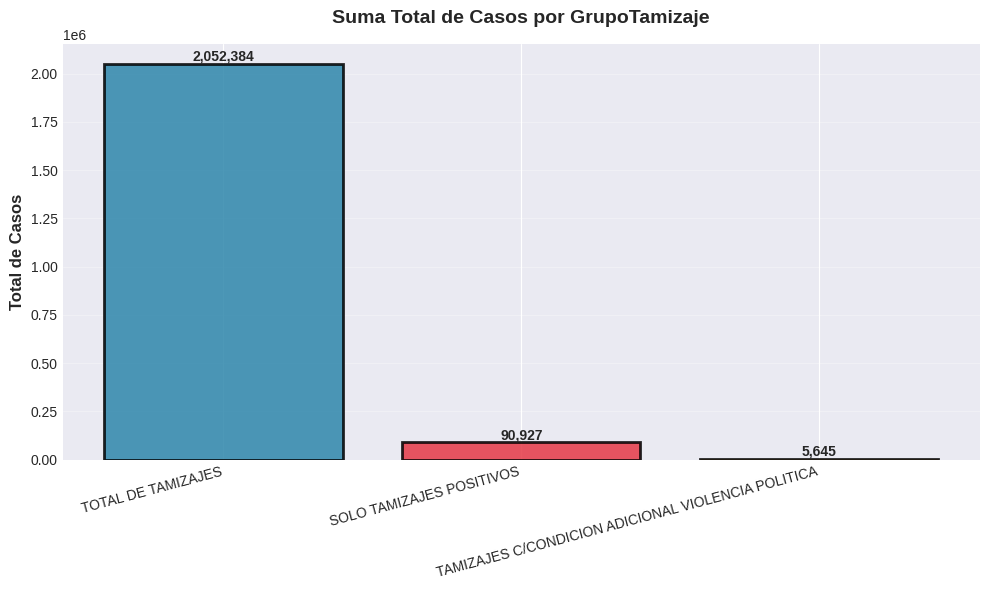

In [ ]:
# Gráfico 2: Suma Total de Casos por Grupo
print("\n📊 Suma Total de Casos por GrupoTamizaje")
suma_total = df.groupby('GrupoTamizaje')['Casos'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(suma_total)), suma_total.values,
               color=colors[:len(suma_total)], alpha=0.85,
               edgecolor='black', linewidth=2)

plt.xticks(range(len(suma_total)), suma_total.index, rotation=15, ha='right')
plt.ylabel('Total de Casos', fontsize=12, fontweight='bold')
plt.title('Suma Total de Casos por GrupoTamizaje', fontsize=14, fontweight='bold', pad=15)
plt.grid(axis='y', alpha=0.3)

for i, (bar, valor) in enumerate(zip(bars, suma_total.values)):
    plt.text(bar.get_x() + bar.get_width()/2, valor,
             f'{valor:,.0f}', ha='center', va='bottom',
             fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('EDA_02_suma_total_casos.png', dpi=300, bbox_inches='tight')
plt.show()


📊 Heatmap: Casos por Tipo de Tamizaje y Grupo


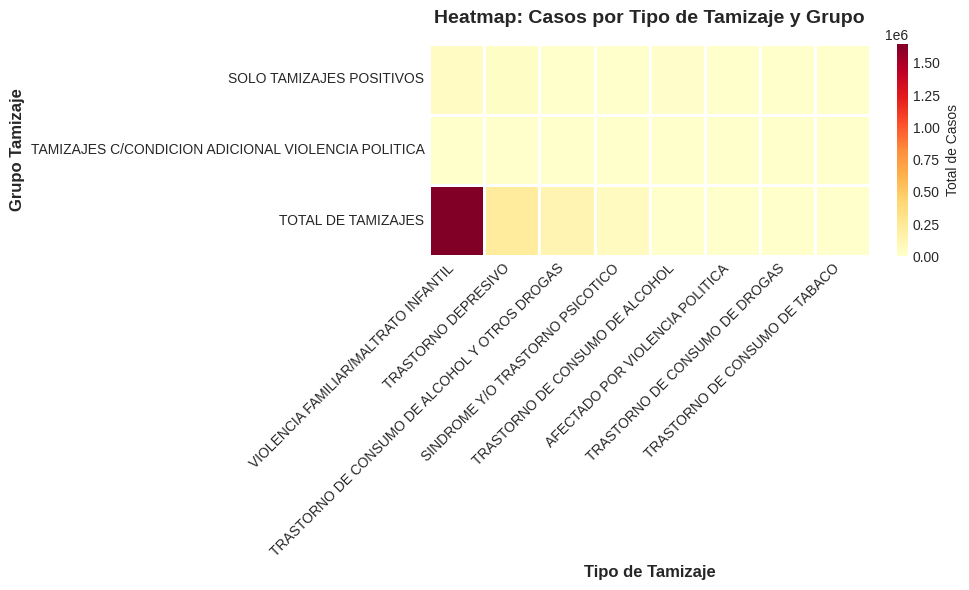

In [ ]:
# Gráfico 3: Heatmap Tipo de Tamizaje vs Grupo
print("\n📊 Heatmap: Casos por Tipo de Tamizaje y Grupo")
top_tipos = df.groupby('DetalleTamizaje')['Casos'].sum().nlargest(10).index
df_top_tipos = df[df['DetalleTamizaje'].isin(top_tipos)]

pivot_tipos = df_top_tipos.pivot_table(
    values='Casos',
    index='DetalleTamizaje',
    columns='GrupoTamizaje',
    aggfunc='sum',
    fill_value=0
)
pivot_tipos = pivot_tipos.loc[top_tipos]

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_tipos.T, annot=False, cmap='YlOrRd',
            linewidths=1, linecolor='white',
            cbar_kws={'label': 'Total de Casos'})
plt.xlabel('Tipo de Tamizaje', fontsize=12, fontweight='bold')
plt.ylabel('Grupo Tamizaje', fontsize=12, fontweight='bold')
plt.title('Heatmap: Casos por Tipo de Tamizaje y Grupo',
          fontsize=14, fontweight='bold', pad=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('EDA_03_heatmap_tipo_grupo.png', dpi=300, bbox_inches='tight')
plt.show()


📊 Heatmap: Casos por Departamento y Grupo


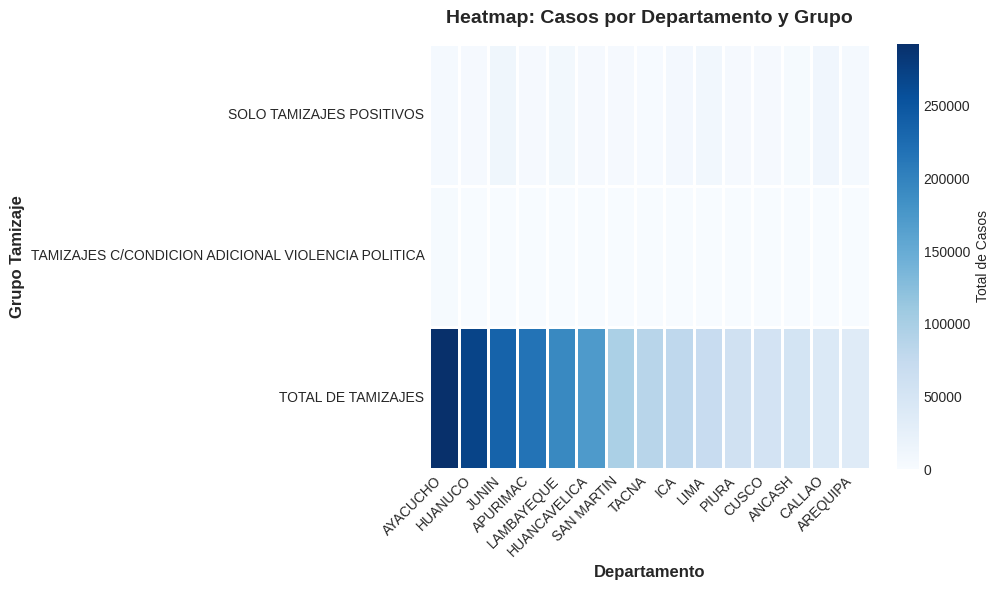

In [ ]:
# Gráfico 4: Heatmap Departamento vs Grupo
print("\n📊 Heatmap: Casos por Departamento y Grupo")
top_depts = df.groupby('Departamento')['Casos'].sum().nlargest(15).index
df_top_dept = df[df['Departamento'].isin(top_depts)]

pivot_dept = df_top_dept.pivot_table(
    values='Casos',
    index='Departamento',
    columns='GrupoTamizaje',
    aggfunc='sum',
    fill_value=0
)
pivot_dept = pivot_dept.loc[top_depts]

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_dept.T, annot=False, cmap='Blues',
            linewidths=1, linecolor='white',
            cbar_kws={'label': 'Total de Casos'})
plt.xlabel('Departamento', fontsize=12, fontweight='bold')
plt.ylabel('Grupo Tamizaje', fontsize=12, fontweight='bold')
plt.title('Heatmap: Casos por Departamento y Grupo',
          fontsize=14, fontweight='bold', pad=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('EDA_04_heatmap_departamento.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# =============================================================================
# FASE 3: PREPARACIÓN DE LOS DATOS (DATA PREPARATION)
# =============================================================================

print("\n" + "="*80)
print("FASE 3: PREPARACIÓN DE LOS DATOS")
print("="*80)


FASE 3: PREPARACIÓN DE LOS DATOS


In [ ]:
# -----------------------------------------------------------------------------
# 3.1. Cálculo de Tasa de Positividad
# -----------------------------------------------------------------------------
print("\n3.1. CÁLCULO DE TASA DE POSITIVIDAD")
print("-"*80)

# Verificar y convertir 'Casos' a numérico
if df['Casos'].dtype == 'object':
    print("⚠️ Convirtiendo 'Casos' a numérico...")
    df['Casos'] = df['Casos'].astype(str).str.replace(',', '').str.replace(' ', '')
    df['Casos'] = pd.to_numeric(df['Casos'], errors='coerce')
    df['Casos'] = df['Casos'].fillna(0)

# Separar registros de TOTAL y POSITIVOS
df_total = df[df['GrupoTamizaje'].str.contains('TOTAL', case=False, na=False)].copy()
df_positivos = df[df['GrupoTamizaje'].str.contains('POSITIVOS', case=False, na=False)].copy()

print(f"✅ Registros de TOTAL: {len(df_total):,}")
print(f"✅ Registros de POSITIVOS: {len(df_positivos):,}")

# Renombrar columnas
df_total = df_total.rename(columns={'Casos': 'Total'})
df_positivos = df_positivos.rename(columns={'Casos': 'Positivos'})

# Eliminar GrupoTamizaje
df_total = df_total.drop(columns=['GrupoTamizaje'])
df_positivos = df_positivos.drop(columns=['GrupoTamizaje'])

# Realizar merge
columnas_join = ['Anio', 'NroMes', 'ubigeo', 'Departamento', 'Provincia',
                 'Distrito', 'Sexo', 'Etapa', 'DetalleTamizaje']

df_pivot = df_total.merge(
    df_positivos[columnas_join + ['Positivos']],
    on=columnas_join,
    how='left'
)

# Llenar NaN y calcular tasa
df_pivot['Positivos'] = df_pivot['Positivos'].fillna(0)
df_pivot['Tasa_Positividad'] = np.where(
    df_pivot['Total'] > 0,
    (df_pivot['Positivos'] / df_pivot['Total']) * 100,
    0
)

# Eliminar filas donde Total = 0
df_pivot = df_pivot[df_pivot['Total'] > 0].copy()

print(f"\n✅ Dataset preparado: {df_pivot.shape[0]:,} filas x {df_pivot.shape[1]} columnas")
print(f"✅ Tasa promedio global: {df_pivot['Tasa_Positividad'].mean():.2f}%")
print(f"✅ Rango de tasas: {df_pivot['Tasa_Positividad'].min():.2f}% - {df_pivot['Tasa_Positividad'].max():.2f}%")



3.1. CÁLCULO DE TASA DE POSITIVIDAD
--------------------------------------------------------------------------------
✅ Registros de TOTAL: 199,776
✅ Registros de POSITIVOS: 34,977

✅ Dataset preparado: 199,776 filas x 12 columnas
✅ Tasa promedio global: 5.34%
✅ Rango de tasas: 0.00% - 3200.00%


In [ ]:
# -----------------------------------------------------------------------------
# 3.2. Detección y Análisis de Anomalías
# -----------------------------------------------------------------------------
print("\n3.2. DETECCIÓN Y ANÁLISIS DE ANOMALÍAS")
print("-"*80)

casos_imposibles = df_pivot[df_pivot['Tasa_Positividad'] > 100].copy()

print(f"\n📊 Casos con tasa > 100%: {len(casos_imposibles):,} registros")
print(f"📊 Porcentaje del total: {len(casos_imposibles)/len(df_pivot)*100:.2f}%")

if len(casos_imposibles) > 0:
    print("\n⚠️ TOP 10 TASAS MÁS ALTAS:")
    top10 = casos_imposibles.nlargest(10, 'Tasa_Positividad')[
        ['Anio', 'NroMes', 'Departamento', 'DetalleTamizaje', 'Sexo', 'Etapa',
         'Total', 'Positivos', 'Tasa_Positividad']
    ]

    for idx, row in top10.iterrows():
        print(f"\n{row['Departamento']} - {row['DetalleTamizaje'][:40]}")
        print(f"  Año: {row['Anio']}, Mes: {row['NroMes']}")
        print(f"  Sexo: {row['Sexo']}, Edad: {row['Etapa']}")
        print(f"  ❌ Total: {row['Total']} | Positivos: {row['Positivos']}")
        print(f"  ❌ Tasa calculada: {row['Tasa_Positividad']:.2f}%")



3.2. DETECCIÓN Y ANÁLISIS DE ANOMALÍAS
--------------------------------------------------------------------------------

📊 Casos con tasa > 100%: 169 registros
📊 Porcentaje del total: 0.08%

⚠️ TOP 10 TASAS MÁS ALTAS:

LIMA - VIOLENCIA FAMILIAR/MALTRATO INFANTIL
  Año: 2017, Mes: 5
  Sexo: F, Edad: 40 - 59
  ❌ Total: 1 | Positivos: 32.0
  ❌ Tasa calculada: 3200.00%

JUNIN - VIOLENCIA FAMILIAR/MALTRATO INFANTIL
  Año: 2017, Mes: 6
  Sexo: F, Edad: 40 - 59
  ❌ Total: 1 | Positivos: 11.0
  ❌ Tasa calculada: 1100.00%

CUSCO - VIOLENCIA FAMILIAR/MALTRATO INFANTIL
  Año: 2017, Mes: 6
  Sexo: F, Edad: 40 - 59
  ❌ Total: 2 | Positivos: 12.0
  ❌ Tasa calculada: 600.00%

CUSCO - VIOLENCIA FAMILIAR/MALTRATO INFANTIL
  Año: 2017, Mes: 6
  Sexo: M, Edad: 30 - 39
  ❌ Total: 1 | Positivos: 6.0
  ❌ Tasa calculada: 600.00%

LIMA - VIOLENCIA FAMILIAR/MALTRATO INFANTIL
  Año: 2017, Mes: 1
  Sexo: M, Edad: 30 - 39
  ❌ Total: 1 | Positivos: 5.0
  ❌ Tasa calculada: 500.00%

ANCASH - VIOLENCIA FAMILIAR/MALT

In [ ]:
# -----------------------------------------------------------------------------
# 3.3. Limpieza de Datos
# -----------------------------------------------------------------------------
print("\n3.3. LIMPIEZA DE DATOS")
print("-"*80)

print(f"\n📊 ANTES DE LIMPIEZA:")
print(f"  • Total registros: {len(df_pivot):,}")
print(f"  • Tasa promedio: {df_pivot['Tasa_Positividad'].mean():.2f}%")
print(f"  • Tasa máxima: {df_pivot['Tasa_Positividad'].max():.2f}%")

# Eliminar tasas imposibles (> 100%)
df_clean = df_pivot[df_pivot['Tasa_Positividad'] <= 100].copy()

print(f"\n🗑️ Eliminados por tasa > 100%: {len(df_pivot) - len(df_clean):,}")
print(f"\n📊 DESPUÉS DE LIMPIEZA:")
print(f"  • Total registros: {len(df_clean):,}")
print(f"  • Tasa promedio: {df_clean['Tasa_Positividad'].mean():.2f}%")
print(f"  • Tasa máxima: {df_clean['Tasa_Positividad'].max():.2f}%")

# Guardar dataset limpio
df_clean.to_csv('dataset_limpio.csv', index=False, encoding='utf-8-sig')
print("\n💾 Dataset guardado: 'dataset_limpio.csv'")


3.3. LIMPIEZA DE DATOS
--------------------------------------------------------------------------------

📊 ANTES DE LIMPIEZA:
  • Total registros: 199,776
  • Tasa promedio: 5.34%
  • Tasa máxima: 3200.00%

🗑️ Eliminados por tasa > 100%: 169

📊 DESPUÉS DE LIMPIEZA:
  • Total registros: 199,607
  • Tasa promedio: 5.15%
  • Tasa máxima: 100.00%

💾 Dataset guardado: 'dataset_limpio.csv'


In [ ]:
# -----------------------------------------------------------------------------
# 3.4. Ingeniería de Características
# -----------------------------------------------------------------------------
print("\n3.4. INGENIERÍA DE CARACTERÍSTICAS")
print("-"*80)

print("🔧 Aplicando One-Hot Encoding a variables categóricas...")
multi_cat_cols = ["Departamento", "Sexo", "DetalleTamizaje", "Etapa"]
df_encoded = pd.get_dummies(df_clean, columns=multi_cat_cols, dtype=int)

print("🗑️ Eliminando columnas: Provincia, Distrito")
df_model_ready = df_encoded.drop(columns=['Provincia', 'Distrito'])

print(f"\n✅ Dataset transformado: {df_model_ready.shape}")
df_model_ready.info()

# Guardar dataset codificado
df_model_ready.to_csv('df_clean_to_model.csv', index=False, encoding='utf-8-sig')
print("\n💾 Dataset guardado: 'df_clean_to_model.csv'")


3.4. INGENIERÍA DE CARACTERÍSTICAS
--------------------------------------------------------------------------------
🔧 Aplicando One-Hot Encoding a variables categóricas...
🗑️ Eliminando columnas: Provincia, Distrito

✅ Dataset transformado: (199607, 47)
<class 'pandas.core.frame.DataFrame'>
Index: 199607 entries, 0 to 199775
Data columns (total 47 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   Anio                                                            199607 non-null  int64  
 1   NroMes                                                          199607 non-null  int64  
 2   ubigeo                                                          199607 non-null  int64  
 3   Total                                                           199607 non-null  int64  
 4   Positivos                                                       199607


3.5. BALANCEO DE DATOS (SMOTE + UNDERSAMPLING)
--------------------------------------------------------------------------------

Forma original: X=(199607, 44), y=(199607,)
Original - Ceros: 171525 | Positivos: 28082
Submuestreo - Ceros retenidos: 12035
Balanceado - Ceros: 12035 | Positivos: 56164
Proporción de ceros: 17.65%

Forma balanceada: X=(68199, 44), y=(68199,)

💾 Dataset balanceado guardado: 'dataset_balanceado.csv'


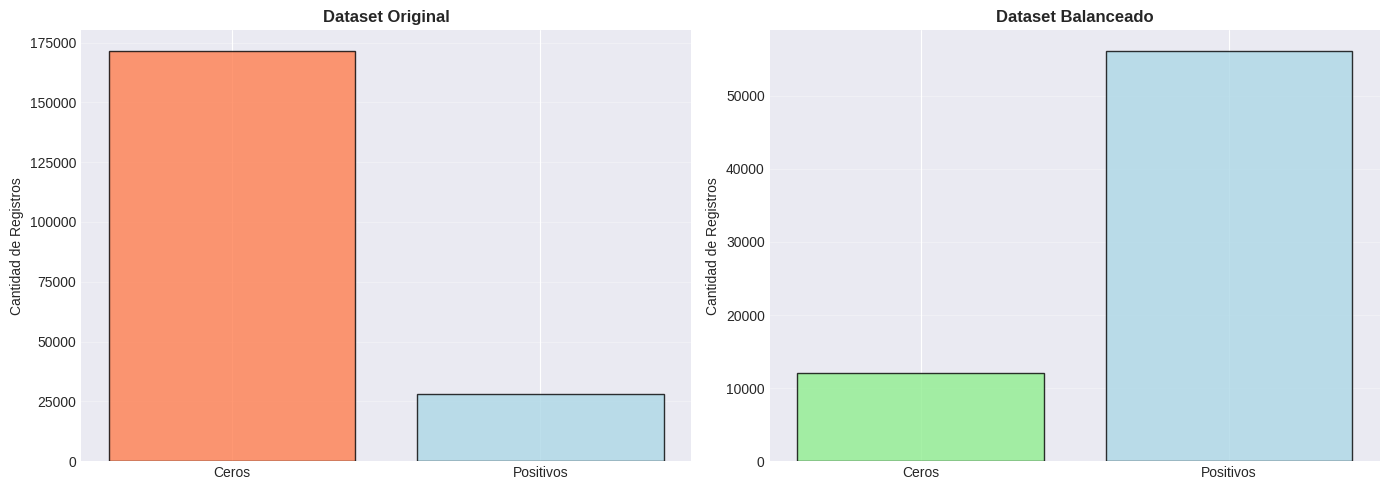

In [ ]:
# -----------------------------------------------------------------------------
# 3.5. Balanceo de Datos
# -----------------------------------------------------------------------------
print("\n3.5. BALANCEO DE DATOS (SMOTE + UNDERSAMPLING)")
print("-"*80)

def balance_zero_non_zero(X, y, zero_ratio=0.5, oversample_factor=2):
    """
    Combina submuestreo de ceros y sobremuestreo de positivos usando SMOTE manual

    Parameters:
    -----------
    X : DataFrame
        Features
    y : Series
        Target variable
    zero_ratio : float
        Proporción deseada de ceros en el dataset final
    oversample_factor : float
        Factor de sobremuestreo para casos positivos
    """
    zero_mask = (y == 0)
    non_zero_mask = ~zero_mask

    X_zero = X[zero_mask]
    y_zero = y[zero_mask]
    X_non_zero = X[non_zero_mask]
    y_non_zero = y[non_zero_mask]

    print(f"Original - Ceros: {len(y_zero)} | Positivos: {len(y_non_zero)}")

    # PASO 1: Submuestrear ceros
    n_zeros_keep = int(len(y_non_zero) / (1 - zero_ratio) * zero_ratio)
    if n_zeros_keep < len(y_zero):
        zero_indices = np.random.choice(len(y_zero), n_zeros_keep, replace=False)
        X_zero_sampled = X_zero.iloc[zero_indices]
        y_zero_sampled = y_zero.iloc[zero_indices]
    else:
        X_zero_sampled = X_zero
        y_zero_sampled = y_zero

    print(f"Submuestreo - Ceros retenidos: {len(y_zero_sampled)}")

    # PASO 2: Sobremuestrear positivos (SMOTE manual)
    n_synthetic = int(len(X_non_zero) * (oversample_factor - 1))
    k = min(5, len(X_non_zero) - 1)

    if k < 1:
        print("⚠️ No hay suficientes positivos para sobremuestrear.")
        X_res = pd.concat([X_zero_sampled, X_non_zero], ignore_index=True)
        y_res = pd.concat([y_zero_sampled, y_non_zero], ignore_index=True)
        return X_res, y_res

    knn = NearestNeighbors(n_neighbors=k + 1)
    knn.fit(X_non_zero)

    synthetic_X = []
    synthetic_y = []

    for _ in range(n_synthetic):
        idx = np.random.randint(0, len(X_non_zero))
        sample_X = X_non_zero.iloc[idx].values
        sample_y = y_non_zero.iloc[idx]

        neighbors_idx = knn.kneighbors([sample_X], return_distance=False)[0]
        neighbor_idx = np.random.choice(neighbors_idx[1:])

        alpha = np.random.random()
        neighbor_X = X_non_zero.iloc[neighbor_idx].values
        neighbor_y = y_non_zero.iloc[neighbor_idx]

        synthetic_sample_X = sample_X + alpha * (neighbor_X - sample_X)
        synthetic_sample_y = sample_y + alpha * (neighbor_y - sample_y)

        synthetic_X.append(synthetic_sample_X)
        synthetic_y.append(synthetic_sample_y)

    # Combinar todos los datos
    synthetic_X_df = pd.DataFrame(synthetic_X, columns=X.columns)
    synthetic_y_series = pd.Series(synthetic_y)

    X_res = pd.concat([X_zero_sampled, X_non_zero, synthetic_X_df], ignore_index=True)
    y_res = pd.concat([y_zero_sampled, y_non_zero, synthetic_y_series], ignore_index=True)
    y_res.name = 'Tasa_Positividad'

    print(f"Balanceado - Ceros: {(y_res == 0).sum()} | Positivos: {(y_res > 0).sum()}")
    print(f"Proporción de ceros: {(y_res == 0).sum() / len(y_res):.2%}")

    return X_res, y_res

# Separar X e y
y = df_model_ready['Tasa_Positividad']
X = df_model_ready.drop(columns=['Tasa_Positividad', 'Total', 'Positivos'])

print(f"\nForma original: X={X.shape}, y={y.shape}")

# Aplicar balanceo
X_balanced, y_balanced = balance_zero_non_zero(X, y, zero_ratio=0.3, oversample_factor=2)

print(f"\nForma balanceada: X={X_balanced.shape}, y={y_balanced.shape}")

# Crear y guardar dataset balanceado
df_balanced = X_balanced.copy()
df_balanced['Tasa_Positividad'] = y_balanced.values

df_balanced.to_csv('dataset_balanceado.csv', index=False, encoding='utf-8-sig')
print("\n💾 Dataset balanceado guardado: 'dataset_balanceado.csv'")

# Visualización comparativa
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Dataset original
axes[0].bar(['Ceros', 'Positivos'],
            [(y == 0).sum(), (y > 0).sum()],
            color=['coral', 'lightblue'], alpha=0.8, edgecolor='black')
axes[0].set_title('Dataset Original', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Cantidad de Registros')
axes[0].grid(axis='y', alpha=0.3)

# Dataset balanceado
axes[1].bar(['Ceros', 'Positivos'],
            [(y_balanced == 0).sum(), (y_balanced > 0).sum()],
            color=['lightgreen', 'lightblue'], alpha=0.8, edgecolor='black')
axes[1].set_title('Dataset Balanceado', fontweight='bold', fontsize=12)
axes[1].set_ylabel('Cantidad de Registros')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('DATA_PREP_balanceo_comparacion.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# =============================================================================
# FASE 4: MODELADO (MODELING)
# =============================================================================

print("\n" + "="*80)
print("FASE 4: MODELADO")
print("="*80)


FASE 4: MODELADO


In [ ]:
# -----------------------------------------------------------------------------
# 4.1. Carga del Dataset Balanceado
# -----------------------------------------------------------------------------
print("\n4.1. CARGA DEL DATASET BALANCEADO")
print("-"*80)

df_final = pd.read_csv('dataset_balanceado.csv')
print(f"✅ Dataset cargado: {df_final.shape}")


4.1. CARGA DEL DATASET BALANCEADO
--------------------------------------------------------------------------------
✅ Dataset cargado: (68199, 45)


In [ ]:
# -----------------------------------------------------------------------------
# 4.2. División de Datos
# -----------------------------------------------------------------------------
print("\n4.2. DIVISIÓN DE DATOS (TRAIN/TEST)")
print("-"*80)

# Definir X e y
y = df_final['Tasa_Positividad']
X = df_final.drop(columns=['Tasa_Positividad', 'Anio'])

# División 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"✅ Datos de entrenamiento: {X_train.shape[0]:,} filas")
print(f"✅ Datos de prueba: {X_test.shape[0]:,} filas")
print(f"✅ Features: {X_train.shape[1]}")


4.2. DIVISIÓN DE DATOS (TRAIN/TEST)
--------------------------------------------------------------------------------
✅ Datos de entrenamiento: 54,559 filas
✅ Datos de prueba: 13,640 filas
✅ Features: 43


In [ ]:
# -----------------------------------------------------------------------------
# 4.3. Entrenamiento del Modelo Base
# -----------------------------------------------------------------------------
print("\n4.3. ENTRENAMIENTO DEL MODELO BASE (RANDOM FOREST)")
print("-"*80)

print("🔄 Entrenando Random Forest Regressor base...")
rf_base = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    oob_score=True,
    verbose=1
)

rf_base.fit(X_train, y_train)
print("✅ Entrenamiento del modelo base completado.")

# Evaluar modelo base
y_pred_base = rf_base.predict(X_test)
r2_base = r2_score(y_test, y_pred_base)
mae_base = mean_absolute_error(y_test, y_pred_base)
oob_base = rf_base.oob_score_

print(f"\n📊 Resultados del Modelo Base:")
print(f"  R² Score:     {r2_base:.4f}")
print(f"  OOB Score:    {oob_base:.4f}")
print(f"  MAE:          {mae_base:.4f}%")


4.3. ENTRENAMIENTO DEL MODELO BASE (RANDOM FOREST)
--------------------------------------------------------------------------------
🔄 Entrenando Random Forest Regressor base...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   38.8s finished


✅ Entrenamiento del modelo base completado.


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.0s



📊 Resultados del Modelo Base:
  R² Score:     0.6675
  OOB Score:    0.6748
  MAE:          11.4668%


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.1s finished


In [ ]:
# -----------------------------------------------------------------------------
# 4.4. Optimización de Hiperparámetros
# -----------------------------------------------------------------------------
print("\n4.4. OPTIMIZACIÓN DE HIPERPARÁMETROS (RANDOM SEARCH)")
print("-"*80)

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

print("🔍 Buscando mejores hiperparámetros...")
print("⏱️  Esto puede tomar varios minutos...")

# Definir el espacio de búsqueda
param_distributions = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', 0.5, 0.7],
    'max_samples': [0.7, 0.8, 0.9, None],
    'bootstrap': [True]
}

# Random Search con validación cruzada
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1, oob_score=True),
    param_distributions=param_distributions,
    n_iter=30,              # Número de combinaciones a probar
    cv=5,                   # Validación cruzada de 5 folds
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Entrenar
random_search.fit(X_train, y_train)

print("\n✅ Optimización completada!")
print("\n📊 MEJORES HIPERPARÁMETROS ENCONTRADOS:")
for param, value in random_search.best_params_.items():
    print(f"  • {param}: {value}")

print(f"\n✅ Mejor R² en validación cruzada: {random_search.best_score_:.4f}")

# Obtener el modelo optimizado
rf_model = random_search.best_estimator_

print("\n🔄 Entrenando modelo final con mejores hiperparámetros...")
rf_model.fit(X_train, y_train)
print("✅ Modelo optimizado entrenado.")


4.4. OPTIMIZACIÓN DE HIPERPARÁMETROS (RANDOM SEARCH)
--------------------------------------------------------------------------------
🔍 Buscando mejores hiperparámetros...
⏱️  Esto puede tomar varios minutos...
Fitting 5 folds for each of 30 candidates, totalling 150 fits

✅ Optimización completada!

📊 MEJORES HIPERPARÁMETROS ENCONTRADOS:
  • bootstrap: True
  • max_depth: None
  • max_features: 0.7
  • max_samples: None
  • min_samples_leaf: 2
  • min_samples_split: 2
  • n_estimators: 147

✅ Mejor R² en validación cruzada: 0.6349

🔄 Entrenando modelo final con mejores hiperparámetros...
✅ Modelo optimizado entrenado.


In [ ]:
# =============================================================================
# FASE 5: EVALUACIÓN (EVALUATION)
# =============================================================================

print("\n" + "="*80)
print("FASE 5: EVALUACIÓN")
print("="*80)



FASE 5: EVALUACIÓN


In [ ]:
# -----------------------------------------------------------------------------
# 5.1. Predicciones
# -----------------------------------------------------------------------------
print("\n5.1. GENERACIÓN DE PREDICCIONES")
print("-"*80)

y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)
print(f"✅ Predicciones generadas para {len(y_pred_test):,} registros de test")


5.1. GENERACIÓN DE PREDICCIONES
--------------------------------------------------------------------------------
✅ Predicciones generadas para 13,640 registros de test


In [ ]:
# -----------------------------------------------------------------------------
# 5.2. Métricas de Evaluación
# -----------------------------------------------------------------------------
print("\n5.2. MÉTRICAS DE EVALUACIÓN DEL MODELO")
print("-"*80)

# Métricas en conjunto de entrenamiento
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

# Métricas en conjunto de prueba
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("\n" + "="*60)
print("📊 RESULTADOS DEL MODELO - CONJUNTO DE ENTRENAMIENTO")
print("="*60)
print(f"R² Score:                           {r2_train:.4f}")
print(f"MAE (Error Absoluto Medio):         {mae_train:.4f}%")
print(f"MSE (Error Cuadrático Medio):       {mse_train:.4f}")
print(f"RMSE (Raíz del MSE):                {rmse_train:.4f}%")

print("\n" + "="*60)
print("📊 RESULTADOS DEL MODELO - CONJUNTO DE PRUEBA")
print("="*60)
print(f"R² Score:                           {r2_test:.4f}")
print(f"MAE (Error Absoluto Medio):         {mae_test:.4f}%")
print(f"MSE (Error Cuadrático Medio):       {mse_test:.4f}")
print(f"RMSE (Raíz del MSE):                {rmse_test:.4f}%")

# Detección de overfitting
print("\n" + "="*60)
print("🔍 ANÁLISIS DE OVERFITTING")
print("="*60)
diff_r2 = r2_train - r2_test
diff_mae = mae_test - mae_train

print(f"Diferencia R² (Train - Test):       {diff_r2:.4f}")
print(f"Diferencia MAE (Test - Train):      {diff_mae:.4f}%")

if diff_r2 > 0.1:
    print("⚠️  Posible overfitting detectado (diferencia R² > 0.1)")
else:
    print("✅ Modelo generaliza bien")

print("="*60)


5.2. MÉTRICAS DE EVALUACIÓN DEL MODELO
--------------------------------------------------------------------------------

📊 RESULTADOS DEL MODELO - CONJUNTO DE ENTRENAMIENTO
R² Score:                           0.4951
MAE (Error Absoluto Medio):         17.1720%
MSE (Error Cuadrático Medio):       552.0039
RMSE (Raíz del MSE):                23.4948%

📊 RESULTADOS DEL MODELO - CONJUNTO DE PRUEBA
R² Score:                           0.4695
MAE (Error Absoluto Medio):         17.5255%
MSE (Error Cuadrático Medio):       576.4524
RMSE (Raíz del MSE):                24.0094%

🔍 ANÁLISIS DE OVERFITTING
Diferencia R² (Train - Test):       0.0256
Diferencia MAE (Test - Train):      0.3535%
✅ Modelo generaliza bien



5.3. IMPORTANCIA DE CARACTERÍSTICAS
--------------------------------------------------------------------------------

📊 TOP 15 CARACTERÍSTICAS MÁS IMPORTANTES:
| Feature                                              | Importance   |
|:-----------------------------------------------------|:-------------|
| DetalleTamizaje_TRASTORNO DEPRESIVO                  | 0.409118     |
| ubigeo                                               | 0.212334     |
| DetalleTamizaje_SINDROME Y/O TRASTORNO PSICOTICO     | 0.062574     |
| Departamento_AREQUIPA                                | 0.0382458    |
| Departamento_AYACUCHO                                | 0.0282425    |
| NroMes                                               | 0.0254605    |
| Departamento_PIURA                                   | 0.0242665    |
| Departamento_LAMBAYEQUE                              | 0.0203142    |
| DetalleTamizaje_VIOLENCIA FAMILIAR/MALTRATO INFANTIL | 0.0195831    |
| Etapa_10 - 11                                

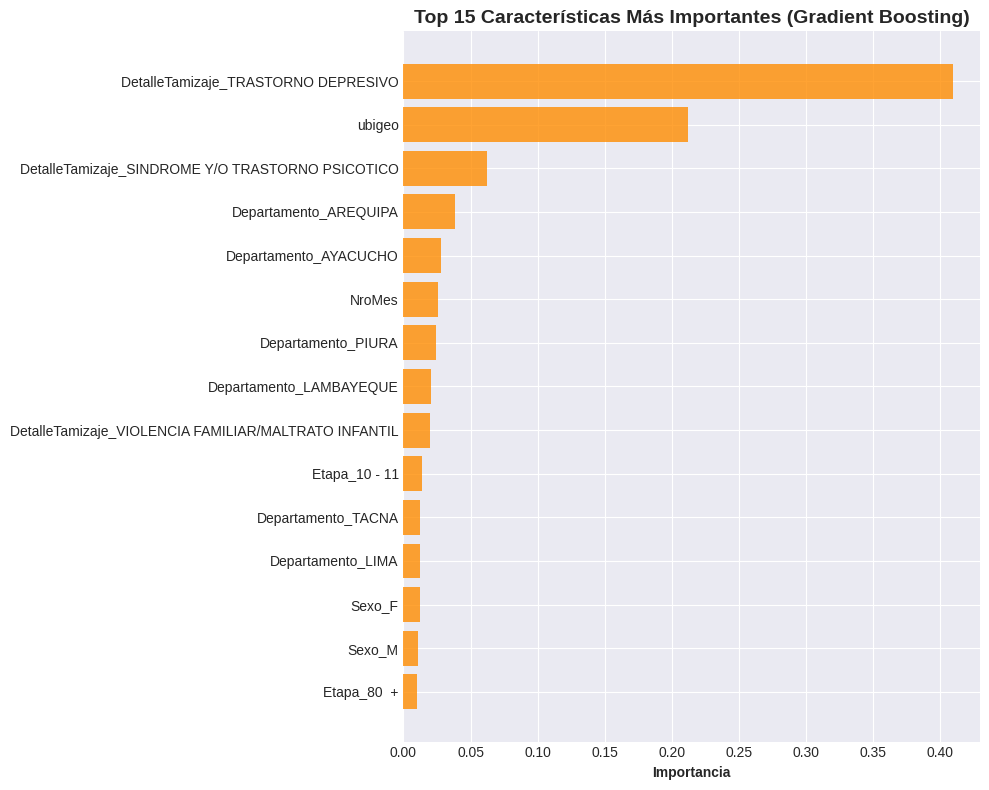

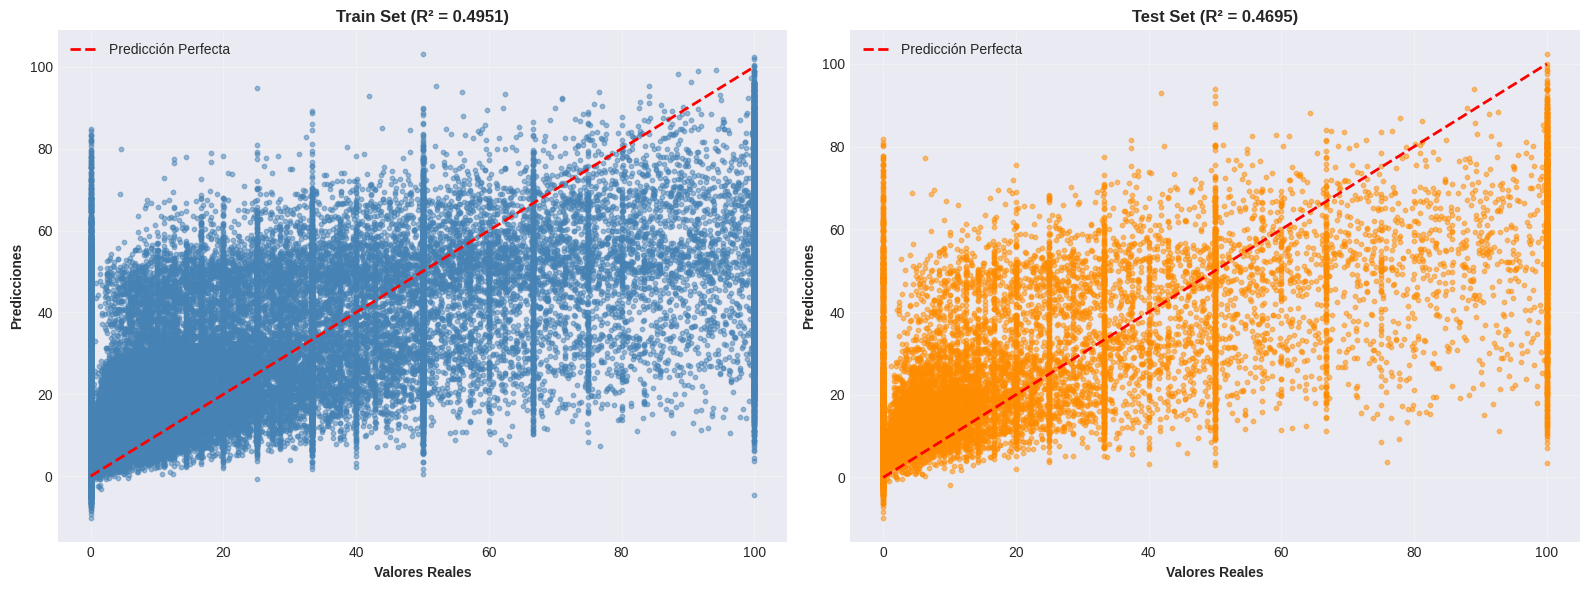

In [ ]:
# -----------------------------------------------------------------------------
# 5.3. Importancia de Características
# -----------------------------------------------------------------------------
print("\n5.3. IMPORTANCIA DE CARACTERÍSTICAS")
print("-"*80)

importances = gb_model.feature_importances_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\n📊 TOP 15 CARACTERÍSTICAS MÁS IMPORTANTES:")
print(feature_importance_df.head(15).to_markdown(index=False, numalign="left", stralign="left"))

# Visualización de importancias
plt.figure(figsize=(10, 8))
top_features = feature_importance_df.head(15)
plt.barh(range(len(top_features)), top_features['Importance'], color='darkorange', alpha=0.8)
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importancia', fontweight='bold')
plt.title('Top 15 Características Más Importantes (Gradient Boosting)',
          fontweight='bold', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('EVALUATION_feature_importance_GB.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualización: Valores Reales vs Predicciones
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Conjunto de entrenamiento
axes[0].scatter(y_train, y_pred_train, alpha=0.5, s=10, color='steelblue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
             'r--', lw=2, label='Predicción Perfecta')
axes[0].set_xlabel('Valores Reales', fontweight='bold')
axes[0].set_ylabel('Predicciones', fontweight='bold')
axes[0].set_title(f'Train Set (R² = {r2_train:.4f})', fontweight='bold', fontsize=12)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Conjunto de prueba
axes[1].scatter(y_test, y_pred_test, alpha=0.5, s=10, color='darkorange')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', lw=2, label='Predicción Perfecta')
axes[1].set_xlabel('Valores Reales', fontweight='bold')
axes[1].set_ylabel('Predicciones', fontweight='bold')
axes[1].set_title(f'Test Set (R² = {r2_test:.4f})', fontweight='bold', fontsize=12)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('EVALUATION_real_vs_pred_GB.png', dpi=300, bbox_inches='tight')
plt.show()


5.4. CURVA DE APRENDIZAJE
--------------------------------------------------------------------------------


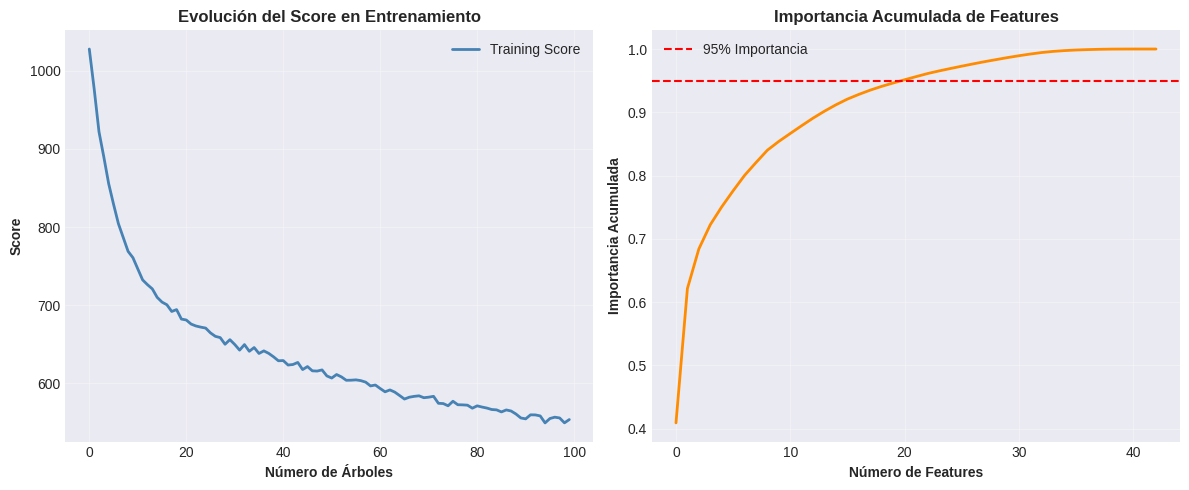

In [ ]:
# -----------------------------------------------------------------------------
# 5.4. Curva de Aprendizaje (Learning Curve)
# -----------------------------------------------------------------------------
print("\n5.4. CURVA DE APRENDIZAJE")
print("-"*80)

# Deviance (loss) durante el entrenamiento
plt.figure(figsize=(12, 5))

# Training deviance
plt.subplot(1, 2, 1)
plt.plot(gb_model.train_score_, label='Training Score', color='steelblue', linewidth=2)
plt.xlabel('Número de Árboles', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.title('Evolución del Score en Entrenamiento', fontweight='bold', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Feature importance acumulada
plt.subplot(1, 2, 2)
cumulative_importance = np.cumsum(sorted(importances, reverse=True))
plt.plot(cumulative_importance, color='darkorange', linewidth=2)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Importancia')
plt.xlabel('Número de Features', fontweight='bold')
plt.ylabel('Importancia Acumulada', fontweight='bold')
plt.title('Importancia Acumulada de Features', fontweight='bold', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('EVALUATION_learning_curve_GB.png', dpi=300, bbox_inches='tight')
plt.show()